# **Airbnb Booking Analysis**    -



##### **Project Type**    - EDA
##### **Contribution**    - Team
#####                       Team Member 1 - Yash Kumar
#####                       Team Member 2 - Taniya Yadav

# **Project Summary -**

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a further unique, individualized way of passing the world. Airbnb is of a kind service that's used and honored by the whole world. Data analysis on millions of rosters handed through Airbnb is a pivotal factor for the company. These millions of rosters induce a lot of data that can be anatomized and used for security, business opinions, understanding of guests and providers(hosts)and performance on the platform, guiding marketing enterprise, perpetration of innovative fresh services, and much further.

* Airbnb is considered to be an online marketplace where people are able to connect with each other, as the people who want to rent out their property look for people, who are looking for accommodation in specific areas.
* The goal of the project - The purpose of the project is to gather information and analyze the detailed information of the different bookings in the neighborhood groups in order to provide insights about the bookings in a particular area as per your preference, type of rooms, and price accordingly.
* We have tried discovering relationships among different columns and found meaningful insights to decipher business impacts.
* Here we have the datset of around 49,000 observations with 16 columns and it is a combination of categorical and numeric values.

# **GitHub Link -**

Yash Kumar (Github) :- https://github.com/yash-rewalia/Airbnb_EDA_Pandas.git

# **Problem Statement**


* What is the count of properties of each room type?
* Name the top 10 hosts who are the busiest in terms of the number of reviews.
* What is the average price for each neighborhood group?
* Show the distribution of properties in a particular neighborhood group.
* Name the top 10 hosts in terms of their average price.
* Find the relationship between all the columns with each other and one another.

#### **Define Your Business Objective?**

* The objective of my analysis is to provide insights about different AirBnbs and their properties.
* Find the key factors responsible for a particular preference for e.g  room type by people.
* Studied the detailed information given about each Airbnb.
* Analyze the behavior of the host, the pattern of change in preference of people in terms of different room types, unequal distribution of properties in each neighborhood group, etc.



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries and connect Google Drive

In [116]:
# Import Libraries
import pandas as pd                   #Importing Pandas library
import numpy as np                    #Importing Numpy library
import matplotlib.pyplot as plt       #Importing Matplot library
import seaborn as sns                 #Importing Seaborn library
import missingno as msno              #Importing missingno library to visualize Nan Values

In [117]:
#Mounting the google drive to the colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [118]:
# Load Dataset
bnb_df=pd.read_csv('/content/drive/MyDrive/Project_EDA/Dataset/Copy of Airbnb NYC 2019.csv')

### Dataset First View

In [119]:
# Dataset First Look
bnb_df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


### Dataset Rows & Columns count

In [120]:
# Dataset Rows & Columns count
bnb_df.shape

(48895, 16)

### Dataset Information

In [121]:
# Dataset Info
bnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [122]:
# Dataset Duplicate Value Count
bnb_df[bnb_df.duplicated()].sum() #After seeing the output we can tell there is no duplicate rows are present

id                                0.0
name                              0.0
host_id                           0.0
host_name                         0.0
neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
last_review                       0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

#### Missing Values/Null Values

In [123]:
# Missing Values/Null Values Count
bnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

<Axes: >

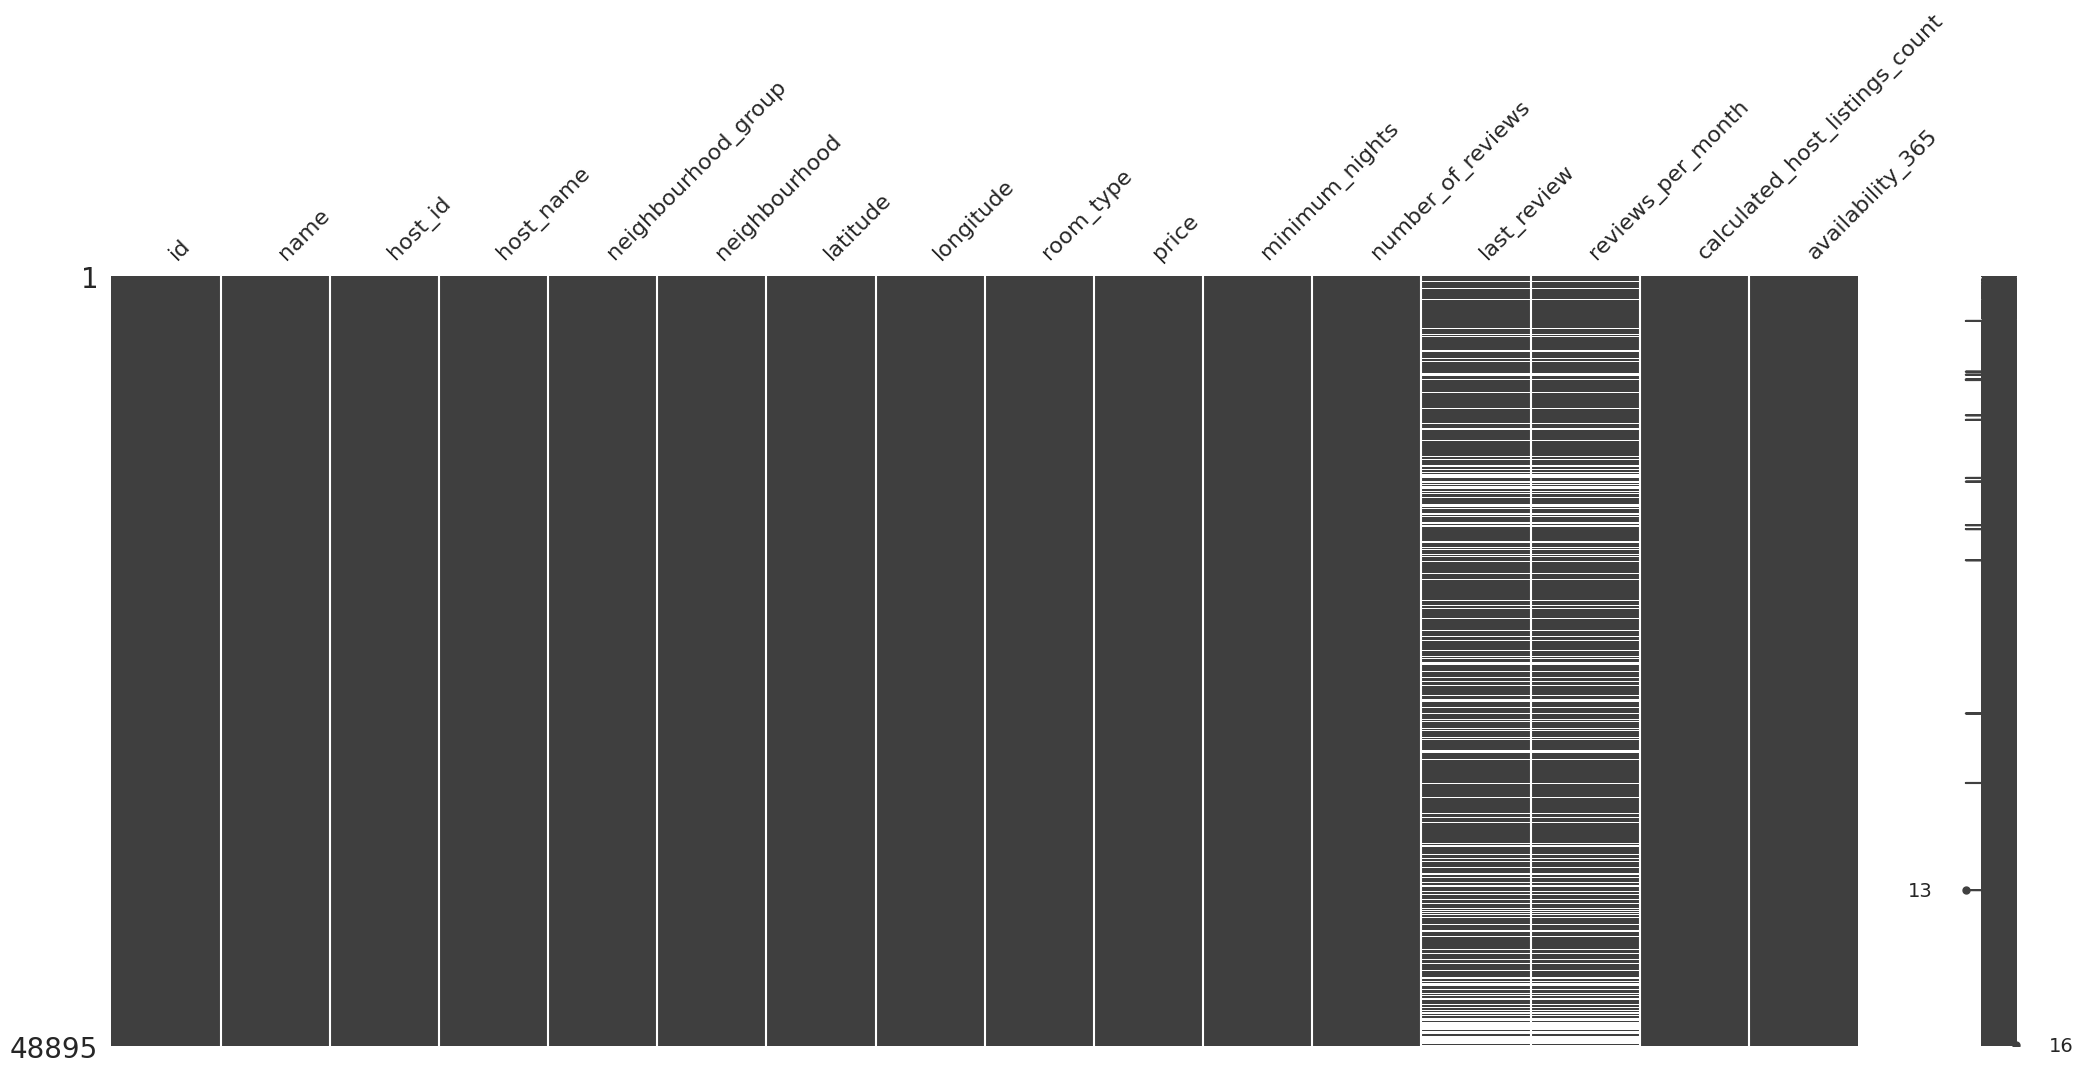

In [124]:
# Visualizing the missing values
msno.matrix(bnb_df)

### What did you know about your dataset?



* As per the above information, we can see the columns host_name, neighbourhood_group, neighborhood, room_type, and reviews_per_month are all object types. Others are either int or float type.

**The following are the counts for null values:**

* name - 16
* host_name - 21
* last_review - 10052
* reviews_per_month - 10052

**The following columns are listed in the DataFrame-**
* ID - ID of the person who booked the Airbnb.
* Name - Name of the person who booked accommodation.
* host_id - ID of the person who rents out the property.
* Host_name - Name of the person who rents out their property.
* neighbourhood_group- It indicates the region that includes several small neighborhoods (i.e. like a broader group having smaller units of neighborhood).
* Neighborhood - It indicates the geographically smaller areas within a city or region having their own local identity and characteristics.
* Latitude - Shows the measurement of the distance from the north or south pole of an equator of that particular property.
* Longitude - Shows the measurement of distance from the east or west prime meridian of that particular property.
* room_type - Indicates the type of the room i.e. private room, Entire home/apt, or shared room.
* price - This indicates the value at which the property is rented in bucks.
* minimum_nights - This shows the minimum nights offered by the host (i.e. a person can't book for less than this set number of nights)
* number_of_reviews - This indicates the number of reviews received by a particular property.
* last_review - Shows the last date of the review given
* reviews_per_month - It indicates the number of reviews given in a particular month.
* calculated_host_listings_count- It shows the count of listings per host.
* availability_365 - It indicates for how many days the Airbnb is available in a year.

## ***2. Understanding Your Variables***

In [125]:
# Dataset Columns
bnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [126]:
# Dataset Describe
bnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Variables Description

**The following columns are listed in the DataFrame-**
* ID(int64) - ID of the person who booked the Airbnb.
* Name(object) - Name of the person who booked accommodation.
* host_id(int64) - ID of the person who rents out the property.
* Host_name(object) - Name of the person who rents out their property.
* neighbourhood_group(object)- It indicates the region that includes several small neighborhoods (i.e. like a broader group having smaller units of neighborhood).
* Neighborhood(object) - It indicates the geographically smaller areas within a city or region having their own local identity and characteristics.
* Latitude(float64) - Shows the measurement of the distance from the north or south pole of an equator of that particular property.
* Longitude(float64) - Shows the measurement of distance from the east or west prime meridian of that particular property.
* room_type(object) - Indicates the type of the room i.e. private room, Entire home/apt, or shared room.
* price(int64) - This indicates the value at which the property is rented in bucks.
* minimum_nights(int64) - This shows the minimum nights offered by the host (i.e. a person can't book for less than this set number of nights)
* number_of_reviews(int64) - This indicates the number of reviews received by a particular property.
* last_review(object) - Shows the last date of the review given
* reviews_per_month(float64) - It indicates the number of reviews given in a particular month.
* calculated_host_listings_count(int64)- It shows the count of listings per host.
* availability_365(int64) - It indicates for how many days the Airbnb is available in a year.

### Check Unique Values for each variable.

In [127]:
# Check Unique Values for each variable.
def unique_values_count():

  ''' This function will return the dictionary in which
  keys denotes the column name and its values denotes the
  unique value counts'''

  di={}
  for i in bnb_df.columns:
    cv=bnb_df[i].unique()
    di[i]=len(cv)
  return di

unique_count=unique_values_count()

In [144]:
#Taking input(column name) from user
col_name_u=input("Enter column name: ").lower()

#Printing the output for unique value counts
print(unique_count[col_name_u])

Enter column name: room_type
3


## 3. ***Data Wrangling***

### Data Wrangling Code

In [130]:
# Drop the unwanted columns and NaN values
bnb_df.drop(['last_review','reviews_per_month'],axis=1,inplace=True)
bnb_df.dropna(inplace=True)

In [131]:
#Check for null values after cleaning
bnb_df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [132]:
# Dataset Info and check how many entries are there left after cleaning the data
bnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48858 non-null  int64  
 1   name                            48858 non-null  object 
 2   host_id                         48858 non-null  int64  
 3   host_name                       48858 non-null  object 
 4   neighbourhood_group             48858 non-null  object 
 5   neighbourhood                   48858 non-null  object 
 6   latitude                        48858 non-null  float64
 7   longitude                       48858 non-null  float64
 8   room_type                       48858 non-null  object 
 9   price                           48858 non-null  int64  
 10  minimum_nights                  48858 non-null  int64  
 11  number_of_reviews               48858 non-null  int64  
 12  calculated_host_listings_count  

In [133]:
#Printing the shape of dataset after handling null values
bnb_df.shape

(48858, 14)

In [134]:
def unique_item(x):

  '''This function return the unique item
  in a given column'''

  return bnb_df[x].unique()


In [146]:
#Taking input(column name) from user
col_name=input("Enter the column name: ").lower()

#Printing the output for unique item in a sorted way
print(np.sort(unique_item(col_name)))

Enter the column name: availability_365
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 23

In [137]:
#Taking a range of host names that they entered their name in a wrong manner
wr_name=list(np.sort(unique_item('host_name'))[-1:-57:-1])

In [138]:
#Creating a list of new host names that we want to replace
new_name=['current Line','genuine','predetermined','binna',"danby","Xinhui","Vedic","Qingming","Yuli", "spicy",
          "poetry moon","Ying","virtue","Shino","Auspicious Yin","astute","Zeyu","Masakawa","Penangli","Berun","Ming Feng",
          "Wen Jing","Quiet","Wen Li","Wen Qing","Si Quan","Peter","Ivy","Steep","Sun Hao","power","Yizhu",
          "ZheWei","Chenggang","Curly Ni","Ran Yang","approve","good","seven","Yuria & Fredy","The Local Apple",
          " Valéria","Daniel","Julia","Тest","Sergey","Oksana","Zina","Vil","Anita","Andrey","Alexei",
          "Alexandrina","A pattern","İlyas","Story","Elodie"]

#Handling a particular host name
bnb_df['host_name']=bnb_df['host_name'].replace('Brooklyn&   Breakfast    -Len-',"Brooklyn & Breakfast")

#Making a dictionary with old and new name respectively
cr_name=dict(zip(wr_name,new_name))

In [139]:
def rename_host(x):

  '''This function will take the dictionary
  and helps to replace the old values i.e keys
  with new values i.e values and reflect the
  changes in main dataset'''

  bnb_df['host_name']=bnb_df['host_name'].replace(x)
  return None

In [140]:
#Doing the changes for the host name
rename_host(cr_name)

In [147]:
def outlier_plot(x):

  '''This function will take the column name
  of a given dataset and plot the boxplot for it.'''

  sns.boxplot(bnb_df[x])
  plt.ylabel(x)
  return plt.show()

Enter col name: minimum_nights


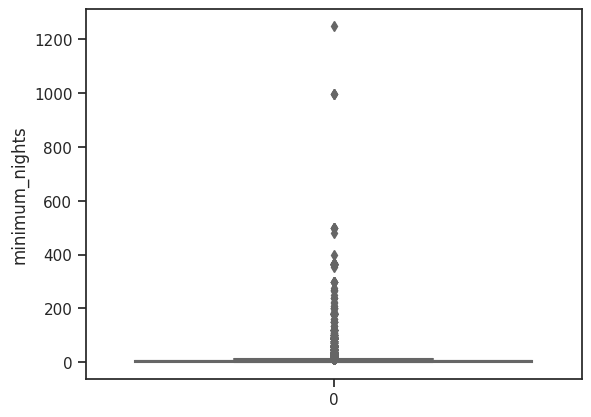

None


In [142]:
#Taking input from user for which column they want
col=input("Enter col name: ").lower()

#Print the plot
print(outlier_plot(col))

In [143]:
# Removing Outliers from minimum_nights columns as we can see in box plot
bnb_df.drop(bnb_df[bnb_df['minimum_nights']>=600].index,inplace=True)

In [148]:
# We have price is 0 for some entries so we have to counter it
mode_ds=bnb_df['price'].mode()

#Replacing 0 price withe mode value and reflecting in main dataset only
bnb_df['price'].replace(to_replace=0,value=mode_ds[0],inplace=True)

In [149]:
# We have availability_365 as 0 for many entries so we have to handle it
mean_ds=bnb_df['availability_365'].mean()

#Replacing 0 availability_365 withe mean value and reflecting in main dataset only
bnb_df['availability_365'].replace(to_replace=0,value=round(mean_ds),inplace=True)

### What all manipulations have you done and insights you found?

* The columns last_review and reviews_per_month had large number of null values which contributed a lot to the data and from analysis point of view these columns are of no significance so we dropped these columns.
* The rows of the columns named name and host_name had null values and as it is too small to be taken into consideration, hence dropped.
* The host name had some invalid name written in different language so handled them by replacing them with their meanings in english language so it could be easily understood while pulling out the insights.




 **The following actions were taken in the above codes**
 * Initially using the box plot tried to plot every columns to decipher which columns outliers may cause problem for analysis and hence came into conclusion that minimum nights coloumn outliers were to be taken into consideration and hence handled it accordingly.
 * Handled the invalid value of the price column i.e. 0 , by replacing it with the mode.
 * Handled the invalid value of availability_365 coloumn i.e. 0 by replacing it with the mean .

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1  
### **No. Of Properties of a particular room type:**

Text(0.5, 1.0, 'No. Of Properties of a particular room type')

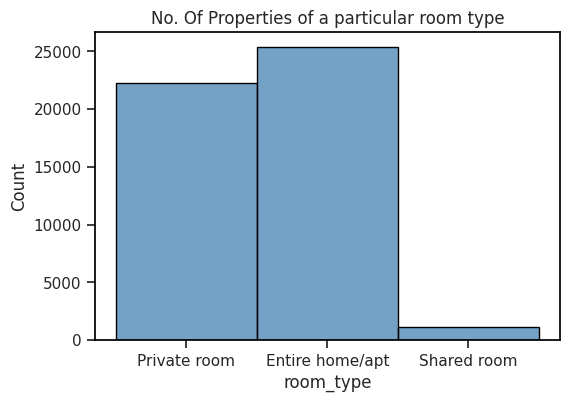

In [95]:
# Chart - 1 visualization code
plt.figure(figsize=(6, 4))
chart1=sns.histplot(data=bnb_df,x='room_type',color='Steelblue',edgecolor='black')
chart1.grid(False)
chart1.spines['top'].set_color('black')
chart1.spines['right'].set_color('black')
chart1.spines['bottom'].set_color('black')
chart1.spines['left'].set_color('black')
plt.title("No. Of Properties of a particular room type")

##### 1. Why did you pick the specific chart?

This graph shows the frequency distribution of each room type so for that we used histogram.

##### 2. What is/are the insight(s) found from the chart?

The insights we found from the graph is that the bookings of shared room are comparatively very low to the other room type where in the entire home/apt has the highest bookings so customer is more centered towards the entire home/apt category.

##### 3. Will the gained insights help creating a positive business impact?

Yes ofcourse it does as we are able to conclude that shared rooms are not prefered by people so we have to figure out why people are least interested in that category so after solving the issue we can also see the demand for shared room also.



#### Chart - 2
### **No. Of Properties in a particular neighbourhood group**

Text(0.5, 1.0, 'No. Of Properties in a particular neighbourhood group')

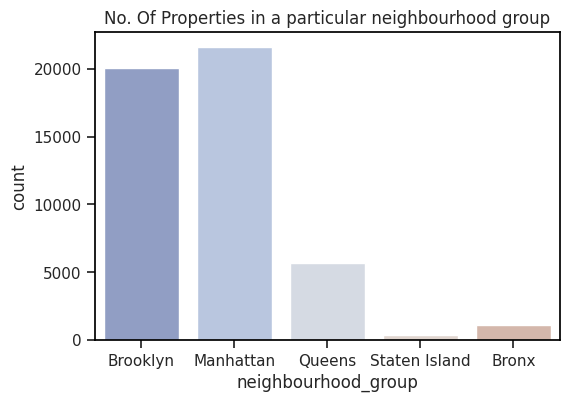

In [96]:
# Chart - 2 visualization code
plt.figure(figsize=(6, 4))
chart2=sns.countplot(data=bnb_df,x='neighbourhood_group')
chart2.grid(False)
chart2.spines['top'].set_color('black')
chart2.spines['right'].set_color('black')
chart2.spines['bottom'].set_color('black')
chart2.spines['left'].set_color('black')
plt.title("No. Of Properties in a particular neighbourhood group")

##### 1. Why did you pick the specific chart?

As this graph shows the number of bookings in each neighbourhood group which is a categorical data and categorical data is best shown with the bar graph .

##### 2. What is/are the insight(s) found from the chart?

It can be concluded that manhatten(neighbourhood group) has the highest number of bookings followed by brooklyn and queens, while Staten island has the least number of bookings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes Manhattan is a hotspot for the customers as we can see that it attains maximum bookings so we should provide more properties in manhattan to fulfill the increasing demands of people.

On the contrary we can see that Staten Island being the least booked is giving a negative impact which needs to be taken into consideration,so to overcome that impact we should run marketing campaigns or surveys and figure out why this type of pattern is coming.

#### Chart - 3
### **Density of properties listed according to minimum nights**

Text(0.5, 1.0, 'Density of properties listed according to minimum nights')

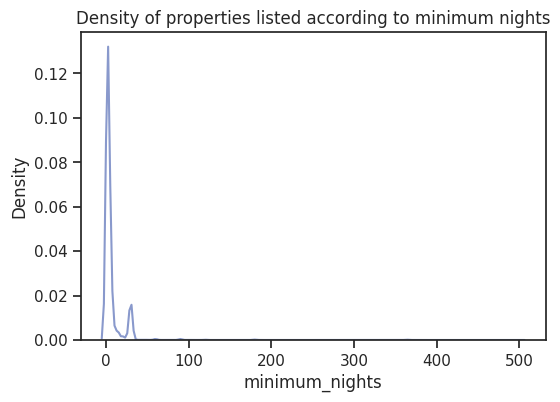

In [97]:
# Chart - 3 visualization code
plt.figure(figsize=(6, 4))
chart3=sns.kdeplot(bnb_df["minimum_nights"])
plt.title("Density of properties listed according to minimum nights")

##### 1. Why did you pick the specific chart?

This graph shows the density /probability of minimum nights in the given dataset so for depicting this data we used kde plot which is appropriate here.

##### 2. What is/are the insight(s) found from the chart?

From the graph we can conclude that the number of minimum nights lie between 1-10 is maximum as it has a high spike here then lowering down around 20 and again a bit high around 30.
So the people either book for a week or 10 day or a month majorly.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can conclude that customers are mostly focus to stay either weekly or monthy roughly , so we should ask the host to rent their properties for weekly or monthly only so that maximum properties can be booked .

#### Chart - 4
### **Count of bookings under each room type of different neighbourhood group**

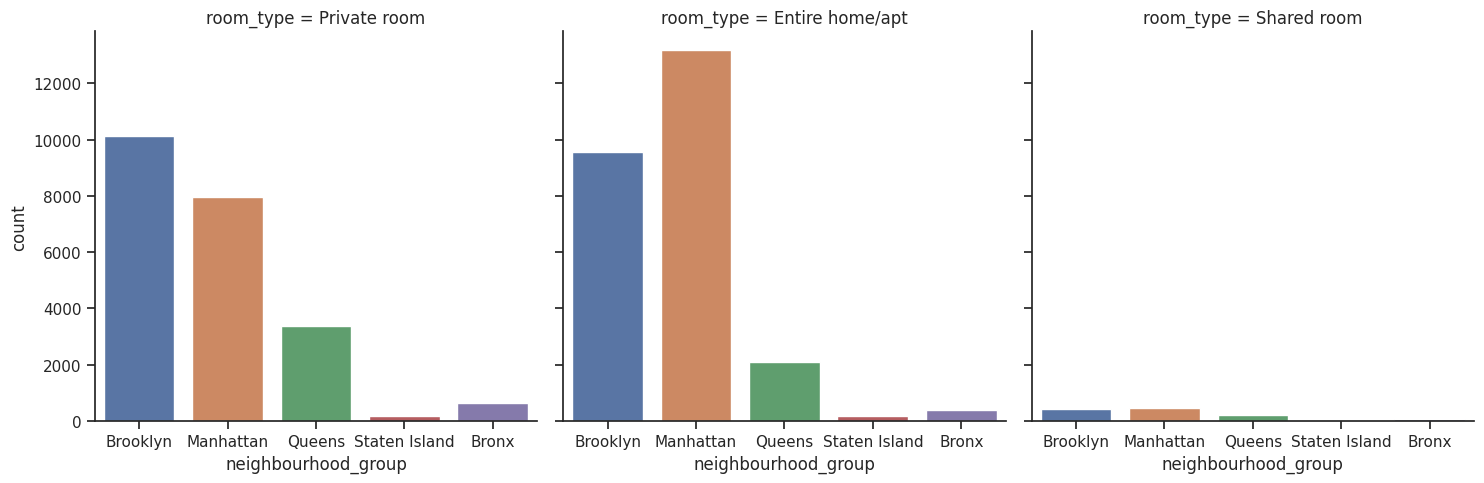

In [98]:
# Chart - 4 visualization code
sns.set(style="ticks", rc={"axes.grid": False})
chart4=sns.catplot(data=bnb_df,x='neighbourhood_group',kind='count',col='room_type')
plt.show()

##### 1. Why did you pick the specific chart?

 Here basically for each category of room type a bar graph is used for having a graphical visualisation of count of bookings.

##### 2. What is/are the insight(s) found from the chart?

It can seen that under private room type , manhatten has the highest number of properties,under Entire home/apt room type brooklyn has the highest number of properties.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It can be infered that staten island has the least number of properties for all the room types followed by bronx so we should do marketing campaigns here so that people rent more of their properties here. Along with this it can seen that manhatten and brooklyn has really low number of bookings comparatively under shared room category hence we should try convincing the host to keep the shared properties to private room type so that more properties can be booked as shared properties are not people preference .

#### Chart - 5
### **Top 5 host in terms of host count**

In [99]:
# Chart - 5 visualization code
host_li_cnt=((bnb_df.groupby(['host_id','host_name'])['calculated_host_listings_count'].sum())
              .sort_values(ascending=False)
              .head().to_dict())
host_n=[]
for i in host_li_cnt.keys():
  host_n.append(i[1])

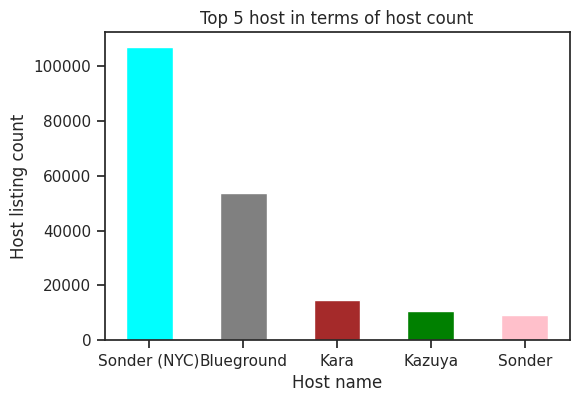

In [100]:
plt.figure(figsize=(6, 4))
plt.bar(host_n,host_li_cnt.values(),width=0.5,color=['cyan','grey','brown','green','pink'])
plt.xlabel("Host name")
plt.ylabel("Host listing count")
plt.title("Top 5 host in terms of host count")
plt.show()

##### 1. Why did you pick the specific chart?

Since the host names are the catagorical data followed by the numerical data of the host count . This can very well be depicted by a bar graph and hence used here.

##### 2. What is/are the insight(s) found from the chart?

From the given graph we were able to understand that sonder(NYC) is the busiest host in terms of host count followed by blueground , kala, kajuya, sonder.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can get the survey done of sonder (NYC) to decipher what makes it peoples choice and let the other host know so that they can very well make the required changes either in terms of price or services provided .

#### Chart - 6
### **Percentage of neighbourhood in each neighbourhood_group**

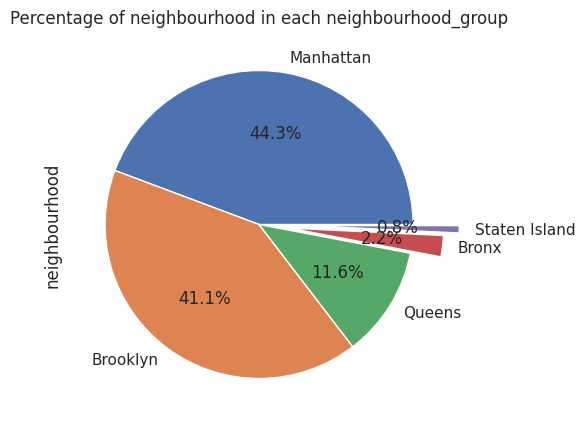

In [101]:
# Chart - 6 visualization code
chart6=(bnb_df.groupby('neighbourhood_group')['neighbourhood'].count()).sort_values(ascending=False)
chart6.plot(kind='pie',autopct='%1.1f%%',explode = [0, 0, 0, 0.2,0.3],figsize=(10,5))
plt.title("Percentage of neighbourhood in each neighbourhood_group")
sns.set_palette('tab20')

##### 1. Why did you pick the specific chart?

This plot shows the percentage of neighbourhood group in each neighbourhood,showing percentage is best suited for pie charts.

##### 2. What is/are the insight(s) found from the chart?

We can infer that manhatten(neighbourhood group) had the most number of neighbourhoods having airbnbs followed by brooklyn,queens bronx and staten island.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As we can conclude from the above graphs that staten island has the least number of properties so therefore we should do advertisements to offer discounts to the host to rent their properties so that we can have more number of properties there.

#### Chart - 7
### **Average price for each neighbourhood group**

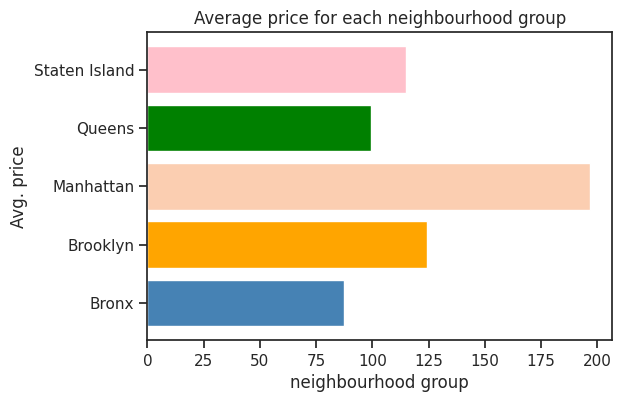

In [102]:
# Chart - 7 visualization code
chart7=round(bnb_df.groupby('neighbourhood_group')['price'].mean(),1).to_dict()
plt.figure(figsize=(6, 4))
plt.barh(list(chart7.keys()),list(chart7.values()),color=['steelblue','orange','#fbceb1','green','pink'])
plt.xlabel("neighbourhood group")
plt.ylabel("Avg. price")
plt.title("Average price for each neighbourhood group")
plt.show()

##### 1. Why did you pick the specific chart?

Here we are comparing the average price for all neighbourhood group which is a categorical data hence used bar graph

##### 2. What is/are the insight(s) found from the chart?

We can conlcude from the graph that manhatten has the most expensive properties as its average price is the highest and it was also seen that it has the highest number of properties too .

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We saw from the other graphs too that staten island has the least number of properties compared to the other neighbourhood group which in turns makes its average price high so to reduce the average price we need to have more number of properties in that particular neighbourhood group  to have a fair competition among other neighbourhood groups.

#### Chart - 8
### **'Density of rooms**

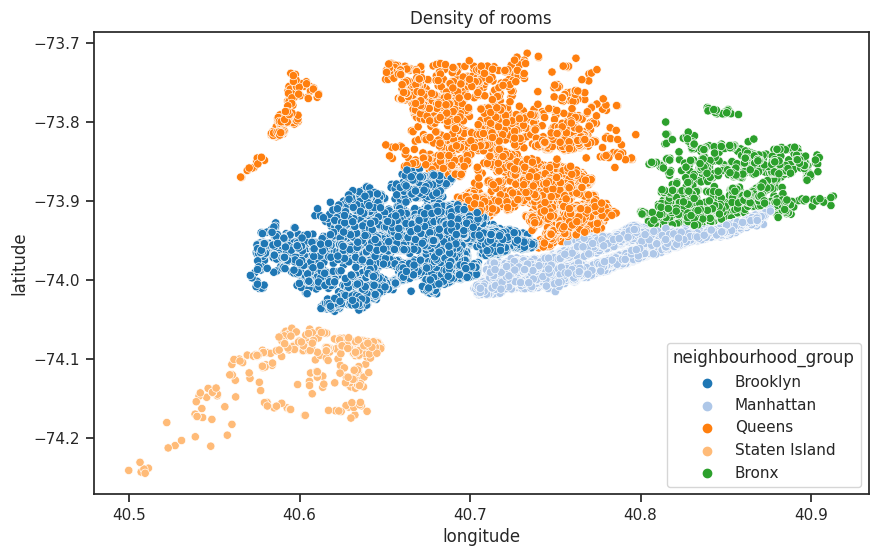

In [103]:
# Chart - 8 visualization code
plt.figure(figsize=(10,6))
chart8=sns.scatterplot(data=bnb_df,x='latitude',y='longitude',hue='neighbourhood_group')
chart8.set_title('Density of rooms')
chart8.set_ylabel('latitude')
chart8.set_xlabel('longitude')
plt.show()

##### 1. Why did you pick the specific chart?

This particular graph was choosen as it depicts the distribution of the location of properties in each neighbourhood group very evidently.

##### 2. What is/are the insight(s) found from the chart?

It can seen from the graph that most densed area is manhatten and most scattered area is queens and the least densed area is staten island.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Since it is clear that the least dense area is staten island and this means it has less number of properties in itself which in turn leads to the shortage of choice for people to make in a particular area.

#### Chart - 9
### **Neighbourhood with the highest count in each neighbourhood group**

In [104]:
# Chart - 9 visualization code
chart9_1=bnb_df.groupby('neighbourhood_group')['neighbourhood'].value_counts()
chart9_2=chart9_1.groupby(level=0).idxmax().to_dict()
max_neighbourhood = list(chart9_1.groupby(level=0).apply(lambda x: x.loc[x.idxmax()]))
grp=list(chart9_2.values())

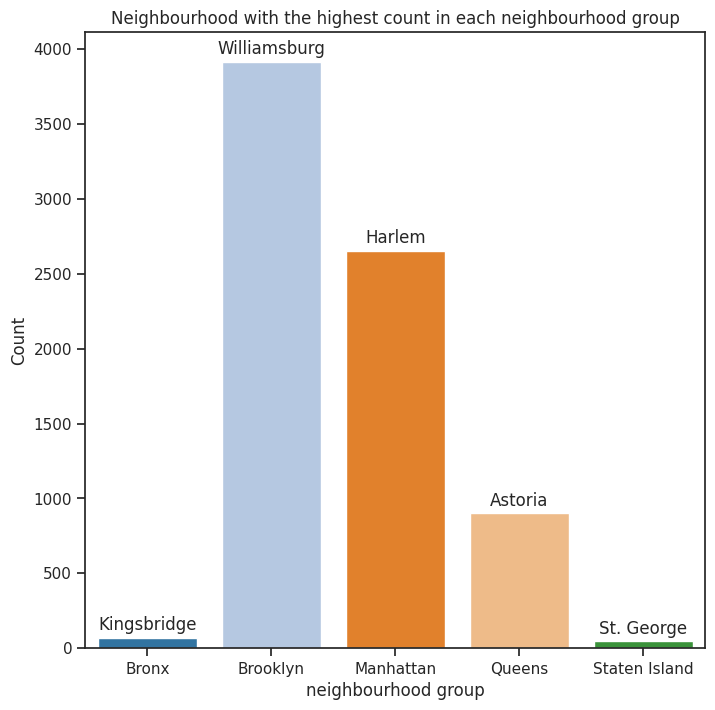

In [105]:
nei_grp=[str(i[0]) for i in grp]
nei_hood=[str(i[1]) for i in grp]
plt.figure(figsize=(8, 8))
axt=sns.barplot(x=nei_grp,y=max_neighbourhood)
axt.grid(False)
for i, v in enumerate(max_neighbourhood):
    axt.text(i, v + 50, nei_hood[i], ha='center')
plt.xlabel('neighbourhood group')
plt.ylabel('Count')
plt.title('Neighbourhood with the highest count in each neighbourhood group')

plt.show()

##### 1. Why did you pick the specific chart?

Here the neighbourhood groups are the categorical data and the count of the neighbourhoods are numerical data and this is very well depicted by the bar graph hence used here.


##### 2. What is/are the insight(s) found from the chart?

The graph shows the area in each neighbourhood group which has the maximum number of properties in that particular neighbourhood group .

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As we can infer from the above graph, the name and the number of properties owned by a particular neighbourhood in that particular neighbourhood group which are maximum, hence we can try to increase properties in that area because of its huge demand.

#### Chart - 10
### **Top 10 host in terms of their avg. price**

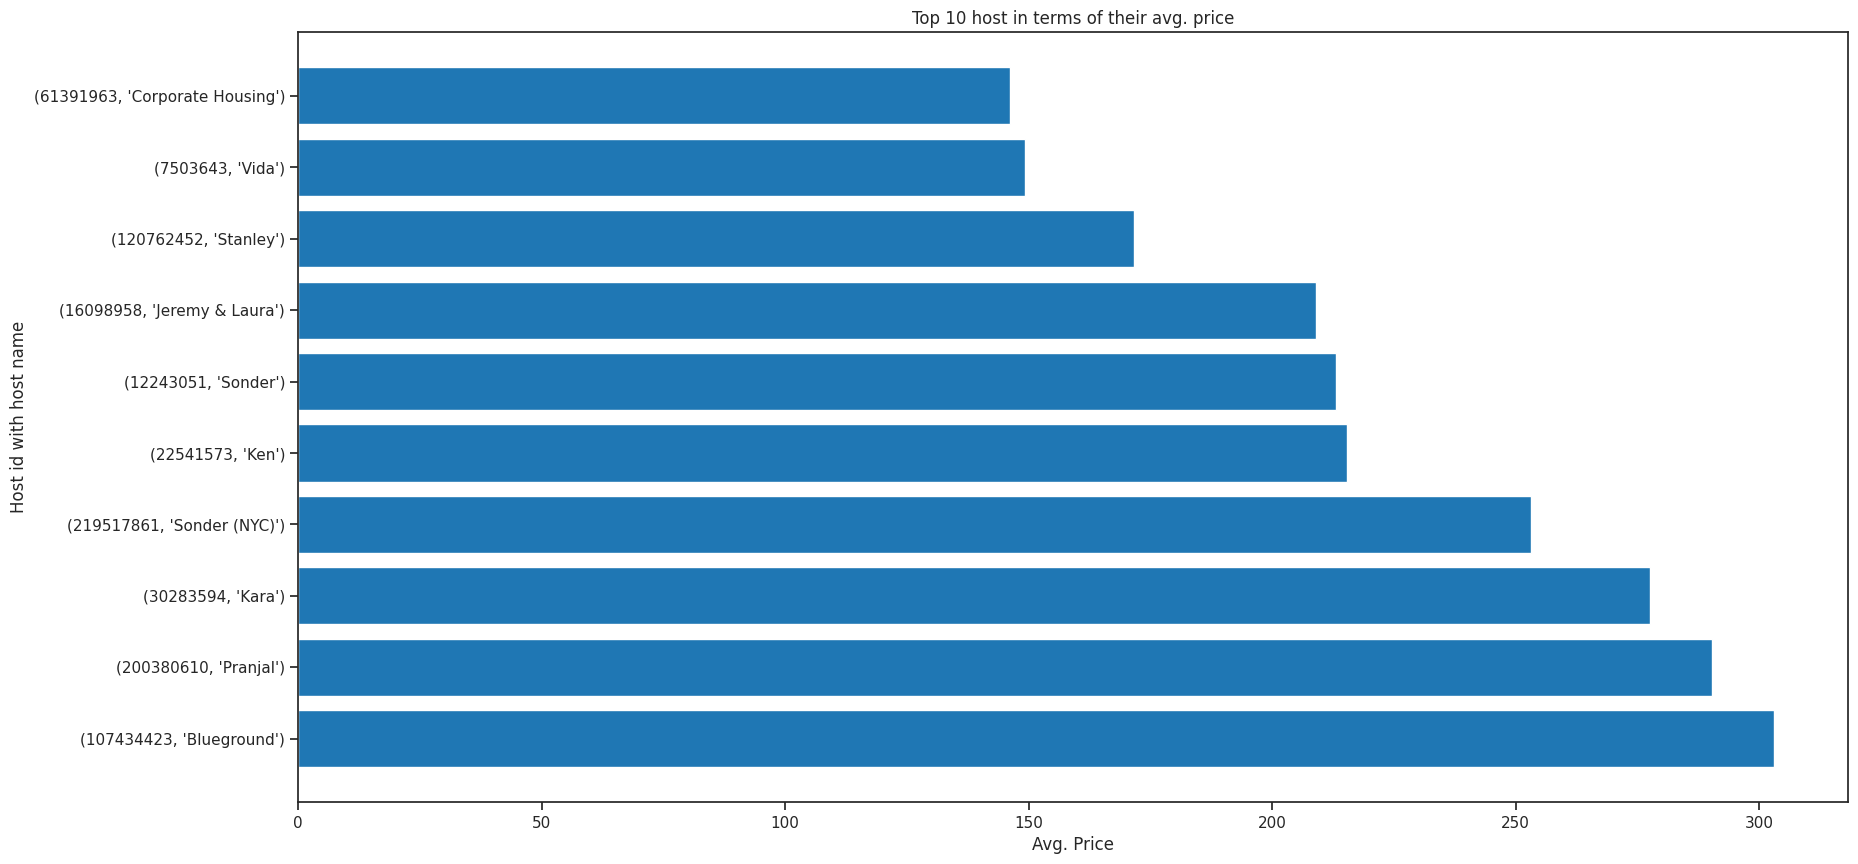

In [106]:
# Chart - 10 visualization code
chart10=(round(bnb_df.groupby(['host_id', 'host_name']).filter(lambda x: len(x) >= 50)
          .groupby(['host_id','host_name'])['price'].mean(),2)
          .sort_values(ascending =False).head(10).to_dict())
name1=[str(i) for i,j in chart10.items()]
price1=[j for i,j in chart10.items()]
plt.figure(figsize=(20, 10))
plt.barh(name1,price1)
plt.xlabel('Avg. Price')
plt.ylabel('Host id with host name')
plt.title('Top 10 host in terms of their avg. price')

plt.show()

##### 1. Why did you pick the specific chart?

Since host name and host id are categorical data and average price is the numerical data and for depicting this appropriate graph is bar graph.

##### 2. What is/are the insight(s) found from the chart?

We can easily infer from the graph that Blueground(host) has the most expensive properties followed by pranjal, kara etc.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By the help of this insight we can find the most premium host as per their avg. price so if the people wants to book a particular host and they want to check their average price so it can be clearing shown as we plot only Top 10 host.
With the help of this our user searching time has been reduced that contribute for the friendly user experience.


#### Chart - 11
### **Minimum Nights vs Price**

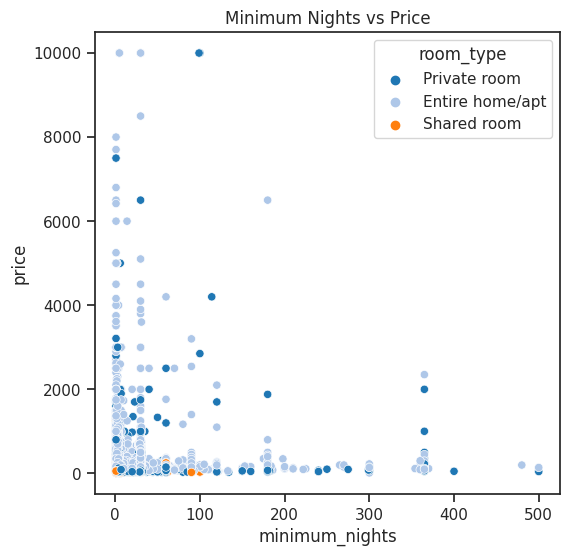

In [107]:
# Chart - 11 visualization code
plt.figure(figsize=(6, 6))
chart11=sns.scatterplot(x='minimum_nights', y='price', data=bnb_df,hue='room_type')
plt.title('Minimum Nights vs Price')
plt.show()

##### 1. Why did you pick the specific chart?

Here we used scatter plot because we wanted to show relationship between two numeric data i.e. minimum nights and price .

##### 2. What is/are the insight(s) found from the chart?

The insights we were able to find from the above graph was that for booking for 3 to 4 months a person will have lot of choice for the properties in airbnbs under 2000 price but above that there are limit to the properties.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can understand how price is varying with the minimun nights can help to make changes to have maximum revenue and occupency. For eg. for longer  minimum stays are associated with lower price, so business can boost by giving longer stays with discounts and offers.

#### Chart - 12
### **Top 10 Hosts with Highest Number of Reviews**

In [108]:
# Chart - 12 visualization code
chart12=(round(bnb_df.groupby(['host_id', 'host_name']).filter(lambda x: len(x) >= 50)
          .groupby(['host_id', 'host_name'])['number_of_reviews'].count(),2)
          .sort_values(ascending=False).head(10))

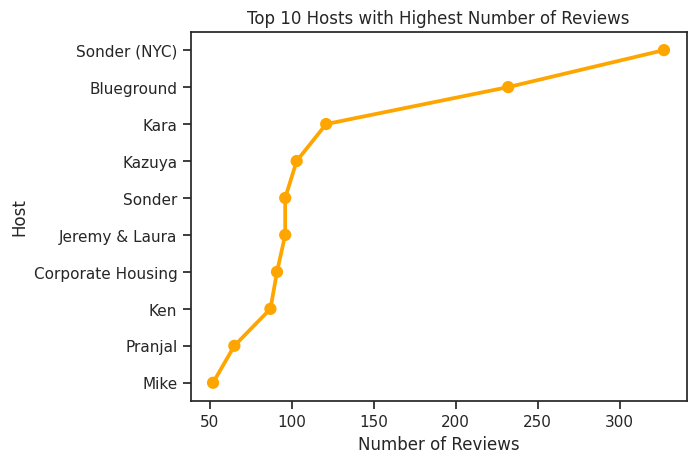

In [109]:
chart12=chart12.reset_index()
sns.pointplot(data=chart12, x='number_of_reviews', y='host_name',color='#FFA500')
plt.xlabel('Number of Reviews')
plt.ylabel('Host')
plt.title('Top 10 Hosts with Highest Number of Reviews')
plt.show()

##### 1. Why did you pick the specific chart?

Here as point plot is used as it helps in representing the estimate of central tendency for numerical variable i.e. number of reviews in this case by the showing the scatter plot points which gives indication of uncertinity around that estimate using error bars.

##### 2. What is/are the insight(s) found from the chart?

We can very well understand from the graph that Sonder(NYC)  is the most busiest host in terms of number of reviews then followed by Blueground and Kara etc.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can try to figure out what are the possible reasons for Sonder(NYC) to be the busiest in terms of reviews and what are the possible reasons people are booking their properties more so that we can ask the other host as well to make required changes.

#### Chart - 13
### **Average Price of different types of room in every neighbourhood group**

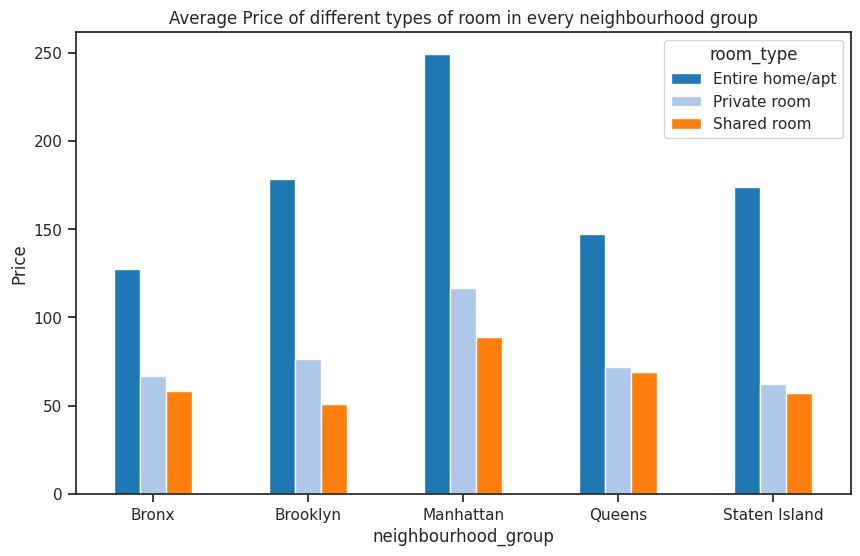

In [110]:
# Chart - 13 visualization code
chart13=bnb_df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
chart13.plot(kind='bar',figsize=(10,6))
plt.title('Average Price of different types of room in every neighbourhood group')
plt.ylabel('Price')
plt.xticks(rotation=0)
plt.grid(False)
plt.show()

##### 1. Why did you pick the specific chart?

Since we can see that here we have numerical data as price and categorical data as the neighbourhood group and also as it is depicted for different room types as well so we used side by side bar graph.

##### 2. What is/are the insight(s) found from the chart?

After understanding the data we found that the average price of entire home/apt is the highest of all the neighbourhood group.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



By understanding  the graph we can say that for the neighborhood group queen ,bronx and Staten Island, private and shared room type have somewhat same average price so it may be the case that people would prefer to stay in private room category than shared one so we should either try reducing the price of shared room or increase the price of private room types.


#### Chart - 14 - Correlation Heatmap

<ipython-input-111-2ee87c6abe30>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = bnb_df.corr(method='kendall')


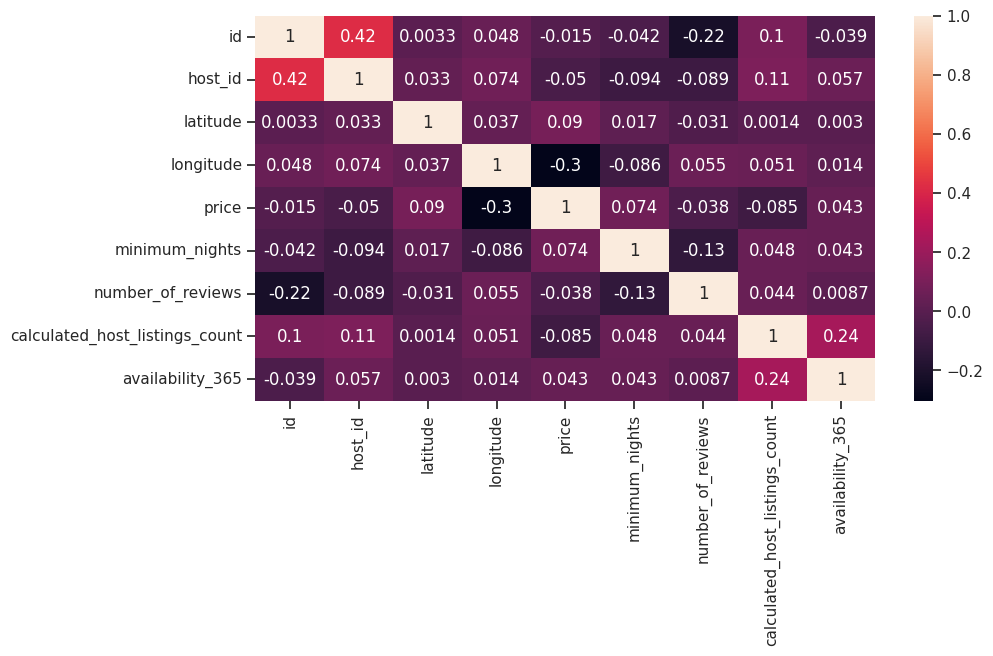

In [111]:
# Correlation Heatmap visualization code
corr = bnb_df.corr(method='kendall')
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True)
plt.show()

##### 1. Why did you pick the specific chart?

This particular graph is the most powerful visualisation as it depicts the relationship of all the columns with each other and one another too.

##### 2. What is/are the insight(s) found from the chart?

Here on the graph the positive values tell us about that that particular variable is directly proportional to other one corresponding to it , the negative value indicates that the variable is indirectly proportional to corresponding varibale and larger the magnitude , more is the dependency. Also 1 indicates that if you were looking at a heatmap of a variable like "minimum nights" plotted on both axes, and you saw a "1" in a cell, it would mean that when the minimum nights is high on the X-axis, it's also high on the Y-axis. When it's low on the X-axis, it's low on the Y-axis, and the relationship between these two instances of minimum nights is very strong and positive.

#### Chart - 15 - Pair Plot

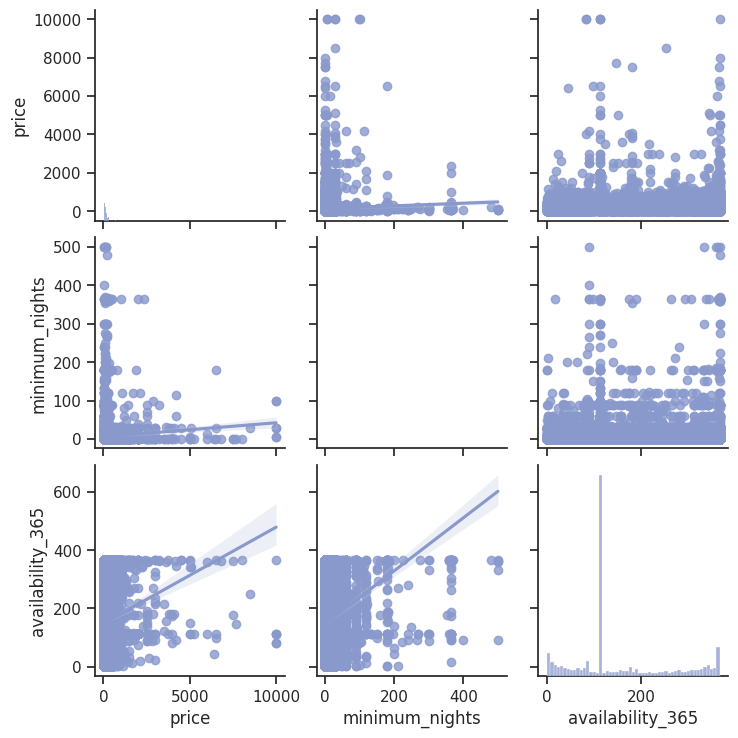

In [112]:
column_name = ['price', 'minimum_nights','availability_365']
pairplot_data = bnb_df[column_name]
sns.set_palette("coolwarm",desat=0.5)
chart15=sns.pairplot(pairplot_data,kind='reg')
plt.show()

##### 1. Why did you pick the specific chart?

Here we wanted to have a pairwise visualisation of all the columns in the dataset , hence used pairplot.

##### 2. What is/are the insight(s) found from the chart?

Here the graph of availability_365 vs price , availability_365 vs minimum_nights,  can be clearly seen that they are has strong positive dependecy i.e. directly proportional.  Also the graphs price vs price, minimum_nights vs minimum_nights and availability_365 vs availability_365  the relationship between them is strong and positive.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?



* As per the current scenario, people usually prefer to go for an entire home / apt because they prefer to put their privacy above the price of the property. So we should try investing more in renting big properties.
* Also, we can say that for most of the neighborhood group, private and shared room types have somewhat similar average prices so it may be the case that people would prefer to stay in the private room category than the shared one so we should either try reducing the price of the shared room or increase the price of private room types.
* We also got to know that some neighborhood groups were dense with properties whereas some had few properties i.e. were scattered which in turn led to a limit of choices for people to make before booking in a particular area, so we should also focus on including more properties there.
* Through this type of analysis, we can help ourselves to make the decision wisely which is helpful to us in terms of quality and user-friendly experience.

# **Conclusion**

Throughout our analysis, we have gained a deeper understanding of various aspects of Airbnb, including pricing dynamics, geographical distribution, property types, and number of reviews.One of the key takeaways from our analysis is the importance of location in determining Airbnb rental prices. We found that certain neighborhoods and cities command higher prices, reflecting the influence of demand, local amenities, and tourist attractions. Hosts can use this information to optimize their pricing strategies, while travelers can make more informed choices based on their budget and preferences.In conclusion, our Airbnb EDA project has illuminated the complex landscape of Airbnb rentals, providing valuable insights for both hosts and travelers. By harnessing the power of Python and data analysis, we have unlocked the potential to make more informed decisions, ultimately enhancing the Airbnb experience for all parties involved. This project serves as a testament to the importance of data-driven decision-making in the modern world of hospitality and travel.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***